In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
import warnings
import pickle
warnings.filterwarnings('ignore')
plt.style.use('seaborn-pastel')
pd.set_option('display.max_rows', 200)

In [28]:
import pandas as pd

# Load datasets
df = pd.read_csv(r'C:\Users\Pragadheesh\Downloads\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')
df1 = pd.read_csv(r"C:\Users\Pragadheesh\Downloads\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2 = pd.read_csv(r"C:\Users\Pragadheesh\Downloads\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3 = pd.read_csv(r"C:\Users\Pragadheesh\Downloads\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4 = pd.read_csv(r"C:\Users\Pragadheesh\Downloads\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")

# Display the DataFrames
print("DataFrame 1:")
print(df.head())
print(df.shape)

print("\nDataFrame 2:")
print(df1.head())
print(df1.shape)

print("\nDataFrame 3:")
print(df2.head())
print(df2.shape)

print("\nDataFrame 4:")
print(df3.head())
print(df3.shape)

print("\nDataFrame 5:")
print(df4.head())
print(df4.shape)

DataFrame 1:
     month        town flat_type block        street_name storey_range  \
0  2017-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1  2017-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2  2017-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3  2017-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4  2017-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   

   floor_area_sqm      flat_model  lease_commence_date     remaining_lease  \
0            44.0        Improved                 1979  61 years 04 months   
1            67.0  New Generation                 1978  60 years 07 months   
2            67.0  New Generation                 1980  62 years 05 months   
3            68.0  New Generation                 1980   62 years 01 month   
4            67.0  New Generation                 1980  62 years 05 months   

   resale_price  
0      232000.0  
1      250000.0  
2      262000.0  
3

In [29]:
# Summary statistics for numerical columns
print("\nDataFrame 1 Summary Statistics:")
print(df.describe())


DataFrame 1 Summary Statistics:
       floor_area_sqm  lease_commence_date  resale_price
count   168252.000000        168252.000000  1.682520e+05
mean        97.301026          1995.846748  4.905054e+05
std         24.020826            13.935071  1.696895e+05
min         31.000000          1966.000000  1.400000e+05
25%         82.000000          1985.000000  3.650000e+05
50%         93.000000          1996.000000  4.600000e+05
75%        112.000000          2009.000000  5.819160e+05
max        249.000000          2022.000000  1.500000e+06


In [31]:
# Merging DataFrames (assuming they share common columns)
merged_df = pd.concat([df, df1, df2, df3, df4], ignore_index=True)

In [32]:
# Reset the index
merged_df.reset_index(drop=True, inplace=True)

In [33]:
# Display columns and head of DataFrame
print("Columns:", merged_df.columns)
print("\nDataFrame Head:")
print(merged_df.head())

Columns: Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

DataFrame Head:
     month        town flat_type block        street_name storey_range  \
0  2017-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1  2017-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2  2017-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3  2017-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4  2017-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   

   floor_area_sqm      flat_model  lease_commence_date     remaining_lease  \
0            44.0        Improved                 1979  61 years 04 months   
1            67.0  New Generation                 1978  60 years 07 months   
2            67.0  New Generation                 1980  62 years 05 months   
3            

In [34]:
merged_df.shape

(914455, 11)

In [35]:
# Assuming 'month' is a datetime column, you can convert it if needed
merged_df['month'] = pd.to_datetime(merged_df['month'])

In [36]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914455 entries, 0 to 914454
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                914455 non-null  datetime64[ns]
 1   town                 914455 non-null  object        
 2   flat_type            914455 non-null  object        
 3   block                914455 non-null  object        
 4   street_name          914455 non-null  object        
 5   storey_range         914455 non-null  object        
 6   floor_area_sqm       914455 non-null  float64       
 7   flat_model           914455 non-null  object        
 8   lease_commence_date  914455 non-null  int64         
 9   remaining_lease      205405 non-null  object        
 10  resale_price         914455 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 76.7+ MB


In [37]:
merged_df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
remaining_lease        709050
resale_price                0
dtype: int64

In [38]:
# droping remaining_lease missing values
merged_df = merged_df.dropna()
merged_df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [39]:
#standardizing all column names to be in snake case
merged_df.columns = merged_df.columns.str.lower().str.replace(' ','_')

In [41]:
# Convert non-numeric values to numeric
merged_df['remaining_lease'] = pd.to_numeric(merged_df['remaining_lease'], errors='coerce')

In [44]:
print(merged_df.columns)

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')


In [46]:
#dropping block, street_name as there are too many unique values 
merged_df.drop(['block', 'street_name'], axis = 1, inplace = True)

In [47]:
#checking remaining object dtype columns and the number of values
for x in merged_df.select_dtypes(include='object').columns:
    print(x, len(merged_df[x].unique()))

town 26
flat_type 7
storey_range 17
flat_model 21


In [54]:
#finding columns with null values
merged_df.isnull().sum().sort_values().tail(8)

town                   0
flat_type              0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [58]:
merged_df = merged_df.drop(['month', 'flat_model','lease_commence_date'], axis=1)

In [55]:
print(merged_df.columns)

Index(['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'remaining_lease', 'resale_price'],
      dtype='object')


In [60]:
# Let's rename the column so it will be clearer
merged_df = merged_df.rename(columns={'flat_type':'number_of_rooms','storey_range':'storey'})

In [61]:
# I assume EXECUTIVE is equal to a 6 room (5 room + 1 study room). MULTI-GENERATION is equal to a 5 room (it served the same purpose).
merged_df['number_of_rooms'] = merged_df['number_of_rooms'].str.replace(r'EXECUTIVE','6 ROOM',regex=True)
merged_df['number_of_rooms'] = merged_df['number_of_rooms'].str.replace(r'MULTI-GENERATION','5 ROOM',regex=True)
merged_df['number_of_rooms'] = merged_df['number_of_rooms'].str.replace(r'ROOM','',regex=True).astype('int')

In [62]:
# I assume that rather we use floor range, I the possible highest floor within the unit storey range.
merged_df['storey'] = merged_df['storey'].str[-2:].astype('int')

In [65]:
merged_df.head()

,town,number_of_rooms,storey,floor_area_sqm,remaining_lease,resale_price
0,ANG MO KIO,2,12,44.0,73.913116,232000.0
1,ANG MO KIO,3,3,67.0,73.913116,250000.0
2,ANG MO KIO,3,3,67.0,73.913116,262000.0
3,ANG MO KIO,3,6,68.0,73.913116,265000.0
4,ANG MO KIO,3,3,67.0,73.913116,265000.0


In [67]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205405 entries, 0 to 914454
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   town             205405 non-null  object 
 1   number_of_rooms  205405 non-null  int32  
 2   storey           205405 non-null  int32  
 3   floor_area_sqm   205405 non-null  float64
 4   remaining_lease  205405 non-null  float64
 5   resale_price     205405 non-null  float64
dtypes: float64(3), int32(2), object(1)
memory usage: 9.4+ MB


In [68]:
merged_df.isna().sum()

town               0
number_of_rooms    0
storey             0
floor_area_sqm     0
remaining_lease    0
resale_price       0
dtype: int64

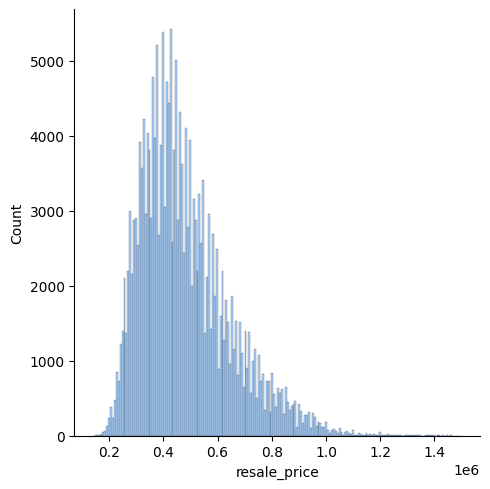

In [69]:
# First, we want to se ethe distribution of HDB resale price in Singapore
sns.displot(merged_df['resale_price'])

In [70]:
# Let see the statistic information of the data
merged_df.describe()

,number_of_rooms,storey,floor_area_sqm,remaining_lease,resale_price
count,205405.000000,205405.000000,205405.000000,205405.000000,2.054050e+05
mean,4.124296,9.659400,97.250265,73.913116,4.808027e+05
std,0.917238,5.850216,24.053218,4.629491,1.653736e+05
min,1.000000,3.000000,31.000000,48.000000,1.400000e+05
25%,3.000000,6.000000,82.000000,73.913116,3.600000e+05
50%,4.000000,9.000000,94.000000,73.913116,4.500000e+05
75%,5.000000,12.000000,112.000000,73.913116,5.700000e+05
max,6.000000,51.000000,280.000000,97.000000,1.500000e+06


<Axes: >

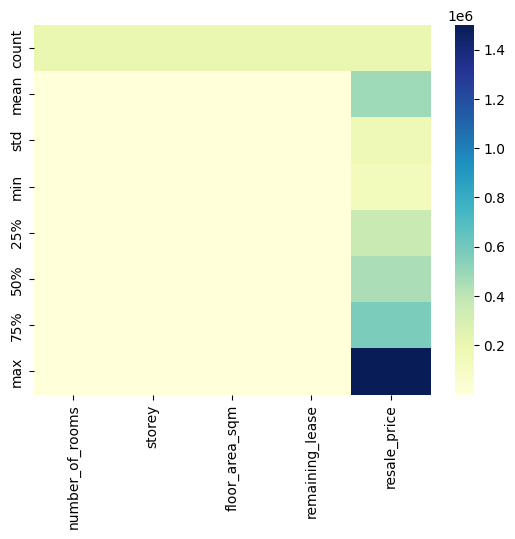

In [71]:
# Let us see the relation between each parameters
sns.heatmap(merged_df.describe(), cmap="YlGnBu")

In [72]:
merged_df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [73]:
merged_df = merged_df.replace(dict.fromkeys(['SEMBAWANG','SENGKANG','WOODLANDS','YISHUN'], 'NORTH'))
merged_df = merged_df.replace(dict.fromkeys(['BUKIT MERAH','BUKIT TIMAH','QUEENSTOWN'], 'SOUTH'))
merged_df = merged_df.replace(dict.fromkeys(['BEDOK','GEYLANG','HOUGANG','KALLANG/WHAMPOA','PASIR RIS','PUNGGOL','SERANGOON','TAMPINES'], 'EAST'))
merged_df = merged_df.replace(dict.fromkeys(['BUKIT BATOK','BUKIT PANJANG','CHOA CHU KANG','CLEMENTI','JURONG EAST','JURONG WEST'], 'WEST'))
merged_df = merged_df.replace(dict.fromkeys(['ANG MO KIO','CENTRAL AREA','BISHAN','MARINE PARADE','TOA PAYOH'], 'CENTRAL'))

In [74]:
# Let's check whether the data replacement was done properly
merged_df['town'].unique()

array(['CENTRAL', 'EAST', 'WEST', 'SOUTH', 'NORTH'], dtype=object)

In [75]:
merged_df = merged_df.rename(columns={'town':'region'})

In [76]:
X = merged_df.iloc[:,:-1].values
y = merged_df.iloc[:,-1].values

In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [78]:
X[1,:]


array([1.0, 0.0, 0.0, 0.0, 0.0, 3, 3, 67.0, 73.91311603369849],
      dtype=object)

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [80]:
from sklearn.linear_model import LinearRegression
Model = LinearRegression()
Model.fit(X_train, y_train)
mdl_ypred = Model.predict(X_test)
mdl_acc = r2_score(y_test,mdl_ypred)
mdl_acc

0.6093267597643629

In [81]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Let's determine the best degree for polynomial
for n in range(2,5):
    poly_reg = PolynomialFeatures(degree = n)
    X_poly = poly_reg.fit_transform(X_train)
    mdl = LinearRegression()
    mdl.fit(X_poly, y_train)
    poly_ypred = mdl.predict(poly_reg.transform(X_test))
    poly_acc = r2_score(y_test,poly_ypred)
    poly_rmse = np.sqrt(mean_squared_error(y_test,poly_ypred))
    print(r'The accuracy of polynomial regression with degree of {} is {}'.format(n,poly_acc))
    print(r'The RMSE of polynomial regression with degree of {} is {}'.format(n,poly_rmse))

The accuracy of polynomial regression with degree of 2 is 0.6589650413445618
The RMSE of polynomial regression with degree of 2 is 96406.569853441
The accuracy of polynomial regression with degree of 3 is 0.6746619198776822
The RMSE of polynomial regression with degree of 3 is 94161.77374611072
The accuracy of polynomial regression with degree of 4 is 0.6844956602882568
The RMSE of polynomial regression with degree of 4 is 92727.77727989106


In [82]:
from sklearn.linear_model import Ridge
ridge_r = Ridge()
ridge_r.fit(X_train, y_train)
ridge_ypred = ridge_r.predict(X_test)
ridge_acc = r2_score(y_test,ridge_ypred)
ridge_acc

0.6093202115779195

In [83]:
from sklearn.linear_model import Lasso
lasso_r = Lasso(max_iter=100000)
lasso_r.fit(X_train, y_train)
lasso_ypred = lasso_r.predict(X_test)
lasso_acc = r2_score(y_test,lasso_ypred)
lasso_acc

0.6093201239652525

In [84]:
from sklearn.linear_model import ElasticNet
EN = ElasticNet()
EN.fit(X_train, y_train)
EN_ypred = EN.predict(X_test)
EN_acc = r2_score(y_test,EN_ypred)
EN_acc

0.5389894820474141

In [85]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
tree_ypred = tree_reg.predict(X_test)
tree_acc = r2_score(y_test,tree_ypred)
tree_acc

0.7550459000406017

In [86]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators = 10)
forest_reg.fit(X_train, y_train)
forest_ypred = forest_reg.predict(X_test)
forest_acc = r2_score(y_test,forest_ypred)
forest_acc

0.7582532284106993

In [ ]:
# Accuracy score for multi linear regression
mlr_acc = r2_score(y_test,mlr_ypred)
mlr_rmse = np.sqrt(mean_squared_error(y_test,mlr_ypred))
# Evaluation for polynomial regression has been calculated in finding the best degree
# Evaluation for ridge regression
ridge_acc = r2_score(y_test,ridge_ypred)
ridge_rmse = np.sqrt(mean_squared_error(y_test,ridge_ypred))
# Evaluation for lasso regression
lasso_acc = r2_score(y_test,lasso_ypred)
lasso_rmse = np.sqrt(mean_squared_error(y_test,lasso_ypred))
# Evaluation for elastic net regression
EN_acc = r2_score(y_test,EN_ypred)
EN_rmse = np.sqrt(mean_squared_error(y_test,EN_ypred))
# Evaluation for decision trees regression
tree_acc = r2_score(y_test,tree_ypred)
tree_rmse = np.sqrt(mean_squared_error(y_test,tree_ypred))
# Evaluation for elastic random forest regression
forest_acc = r2_score(y_test,forest_ypred)
forest_rmse = np.sqrt(mean_squared_error(y_test,forest_ypred))
# Let's put it as a list and compare it in a bar chart
model_acc_score = [mlr_acc,poly_acc, ridge_acc, lasso_acc, EN_acc, tree_acc, forest_acc]
model_rmse = [mlr_rmse, poly_rmse, ridge_rmse, lasso_rmse, EN_rmse, tree_rmse, forest_rmse]
model_list = ['Multi Linear', 'Polynomial', 'Ridge', 'Lasso', 'Elastic Net', 'Decision Tree', 'Random Forest']
model_result_df = pd.DataFrame(
    {'Model': model_list,
     'Accuracy score': model_acc_score,
     'RMSE': model_rmse
    })
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
sns.barplot(data=model_result_df, x='Model', y='Accuracy score', ax=ax1,order=model_result_df.sort_values('Accuracy score',ascending = False).Model).set_title("Comparison of accuracy score between ML regression models")
ax1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
sns.barplot(data=model_result_df, x='Model', y='RMSE', ax=ax2, order=model_result_df.sort_values('RMSE').Model).set_title("Comparison of RMSE between ML regression models")
ax2 = ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

In [ ]:
# We know that after One Hot Encoding, the value of Central, East, North, South, and West is one at column 1,2,3,4, and 5, respectively (following alphabetical order).
area = ['Central','East','North','South','West']
pred_price_central = forest_r.predict([[1.0, 0.0, 0.0, 0.0, 0.0, 4, 9, 95.0, 75]])[0]
pred_price_east = forest_r.predict([[0.0, 1.0, 0.0, 0.0, 0.0, 4, 9, 95.0, 75]])[0]
pred_price_north = forest_r.predict([[0.0, 0.0, 1.0, 0.0, 0.0, 4, 9, 95.0, 75]])[0]
pred_price_south = forest_r.predict([[0.0, 0.0, 0.0, 1.0, 0.0, 4, 9, 95.0, 75]])[0]
pred_price_west = forest_r.predict([[0.0, 0.0, 0.0, 0.0, 1.0, 4, 9, 95.0, 75]])[0]
resale_price = [pred_price_central,pred_price_east,pred_price_north,pred_price_south,pred_price_west]
predict_df = pd.DataFrame(list(zip(area, resale_price)),
              columns=['Area','Predicted HDB price (SGD)'])
predict_df.round()